In [1]:
# Dependencies
import requests as req
import json
import zipcodes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import http.client
from datetime import datetime
import time as time
import zip_functions as zf

In [2]:
#read zip code file and verify the zip is valid
all_zips = pd.read_csv("Resources/free-zipcode-database-Primary.csv")

In [3]:
# get latitude and longitude of target zipcode for use with google places
target_zip = input("Which zipcode would you like to score? ")
invalid_zip = True

#make sure the zip code is in the valid zip code file
while y == True:
    if any(all_zips["Zipcode"] == int(target_zip)):

        invalid_zip = False

    else:
        print("That is not a valid zip code")
        target_zip = input("Please try a new zipcode ")


lat = zipcodes.matching(target_zip)[0]["lat"]
lng = zipcodes.matching(target_zip)[0]["long"]
city = zipcodes.matching(target_zip)[0]["city"]
state = zipcodes.matching(target_zip)[0]["state"]

Which zipcode would you like to score? 22201
valid zip


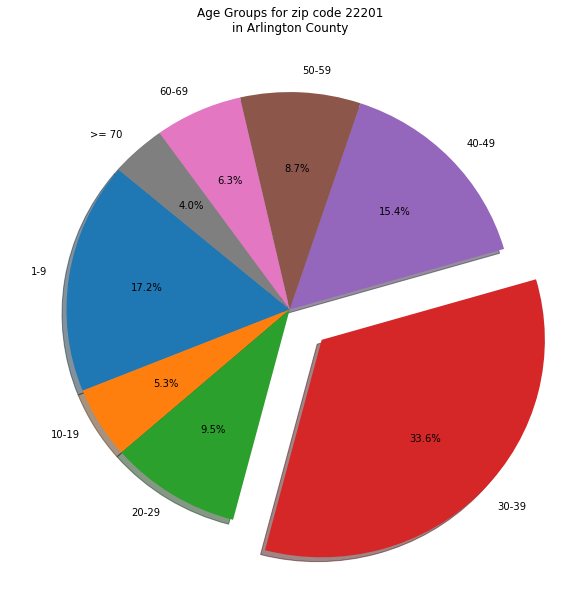

In [4]:
# get and plot the community data and age demographics
resp = zf.get_community_data(target_zip)
zf.age_demographics_zip(resp,target_zip)

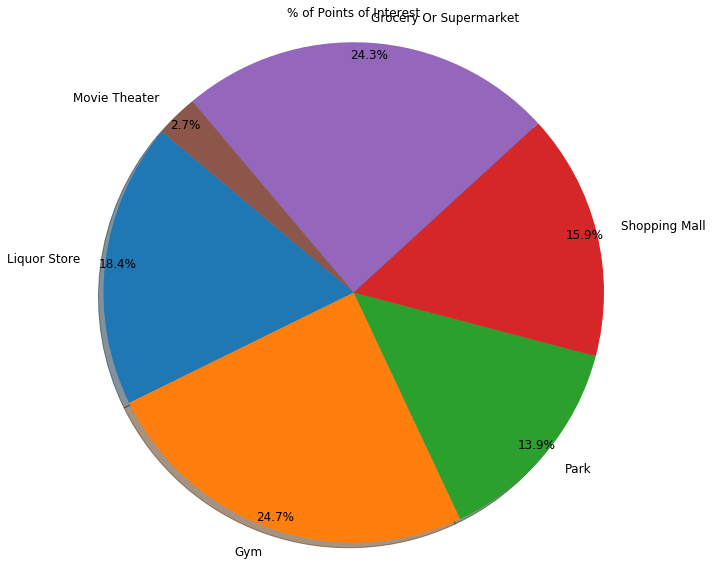

In [5]:
# run the pie_plot function to graph points of interest
# poi is the return dictionary of results from the barfinder function
poi = zf.barfinder(lat,lng)
poi_total = sum(poi.values())
zf.pie_plot(poi, target_zip)


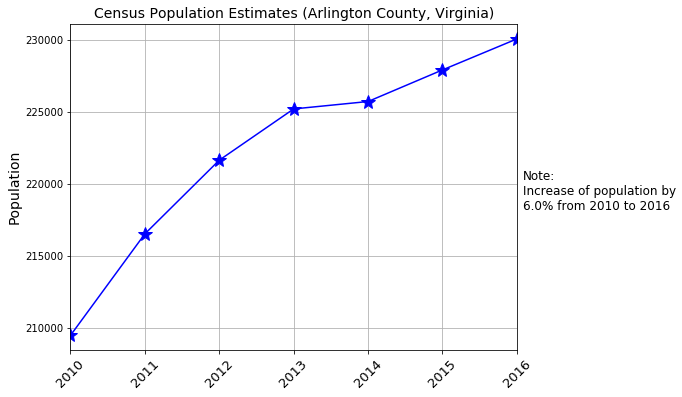

,Population,Years,Difference,Percent Change
0,209449,2010,0,0.00
1,216504,2011,7055,3.37
2,221625,2012,5121,2.37
3,225187,2013,3562,1.61
4,225702,2014,515,0.23
5,227897,2015,2195,0.97
6,230050,2016,2153,0.94


In [6]:
# Use the census data to determine population growth for zip codes
pop_est,county_name,state_name = zf.cen_block_query(lat,lng)
zf.census_plot(pop_est,county_name,state_name)
zf.population_df_generator(pop_est)

no value for: 2017-12


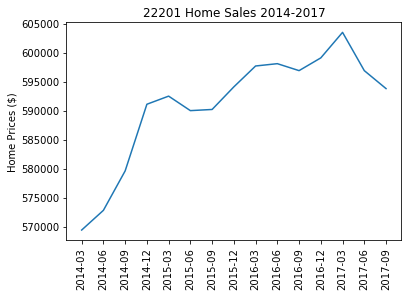

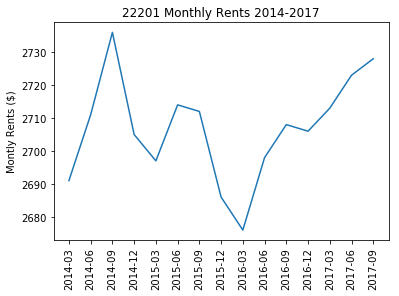

Market Health: 2.53389168855
Walkability and Bikability Scores: 73: Very Walkable, 73: Very Bikeable
private: 6, public: 24, catholic: 4, other: 0
RE home: 0.01, RE_rent: 0.01, MH: 0.0126694584428, WK: 0.0365, TX: 0.02
crime: 0.15, winter: 0.04, summer: 0.075, popg: 0.05, POI: 0.25, SCH: 0.04166666666666667
0.695836125109


In [7]:
#create the factors dictionary 
zip_factors_dict = {}


#get Real Estate data 
df, periods, zip_factors_dict['home_value'], zip_factors_dict['rent'] = zf.get_home_data(target_zip, city, state)

#plot the home values and rent
zf.plot_homes(df,target_zip,periods)

#get more data for the zip code and store in the dictionary
zip_factors_dict = zf.get_zip_factors(target_zip,lat, lng, zip_factors_dict)    

#get school data
#radius in miles -- what do we want to use here? 2 is fine for urban and suburban; may be too small for rural
radius = 5
#total schools, private, public, catholic
ts, pv, pub, ca = zf.get_school_data(lat, lng, radius)

# plot the school data
zf.plot_schools(pv, pub, ca, radius, target_zip)

#store results in factors dictionary
zip_factors_dict["private_schools"] = pv
zip_factors_dict["public_schools"] = pub
zip_factors_dict["cath_schools"] = ca


#get other factors from census and google
#### NEED TO CALL THOSE FUNCTIONS AND POPULATE the DICTIONARY WITH REAL VALUES
zip_factors_dict['pop_growth'] = 0.1
zip_factors_dict['poi'] = poi_total


#compute the score from the values in the dictionary
score = zf.compute_score(zip_factors_dict)

In [8]:
#print the score 
print("Score (range 0-100) for Zip Code %s: %s" % (target_zip, int(score*100)))

Score (range 0-100) for Zip Code 22201: 69
